#**Proyecto Retraso de Vuelos Hackathon** 🛩️

#Proceso de Extraccion

In [ ]:
#Importando los datasets
#df_airlines = pd.read_csv('/content/drive/MyDrive/Hackthon ONE DataScience/Datasets/Airlines.csv')
#df_flights = pd.read_csv('/content/drive/MyDrive/Hackthon ONE DataScience/Datasets/flights.csv')
#df_flights2 = pd.read_csv('/content/drive/MyDrive/Hackthon ONE DataScience/Datasets/flightsA.csv')

In [ ]:
#Importando los data sets
!pip install gdown
import gdown
import pandas as pd


gdown.download("https://drive.google.com/uc?id=1bsw3JzrTO9TvkeWXkwzzkcoIauIUATa5", "airlines.csv", quiet=False)
gdown.download("https://drive.google.com/uc?id=1oKHerKcWhA8LqE1qGRBhhpKtFe0dV6-e", "flights.csv", quiet=False)
gdown.download("https://drive.google.com/uc?id=19ur9JXXeV9I0PpN7EBlVDA8uIG0cXabV", "delays.csv", quiet=False)



Downloading...
From: https://drive.google.com/uc?id=1bsw3JzrTO9TvkeWXkwzzkcoIauIUATa5
To: /content/airlines.csv
100%|██████████| 18.5M/18.5M [00:00<00:00, 41.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1oKHerKcWhA8LqE1qGRBhhpKtFe0dV6-e
From (redirected): https://drive.google.com/uc?id=1oKHerKcWhA8LqE1qGRBhhpKtFe0dV6-e&confirm=t&uuid=36bc2ada-a8fa-4457-9571-ce6b5e05b501
To: /content/flights.csv
100%|██████████| 592M/592M [00:08<00:00, 73.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=19ur9JXXeV9I0PpN7EBlVDA8uIG0cXabV
From (redirected): https://drive.google.com/uc?id=19ur9JXXeV9I0PpN7EBlVDA8uIG0cXabV&confirm=t&uuid=e8e8c605-2ab9-4336-8614-ff0a30b443e4
To: /content/delays.csv
100%|██████████| 592M/592M [00:12<00:00, 48.8MB/s]


'delays.csv'

In [ ]:
df1 = pd.read_csv("airlines.csv")
dfA  = pd.read_csv("flights.csv")
dfAp   = pd.read_csv("delays.csv")

/tmp/ipython-input-3702612662.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dfA  = pd.read_csv("flights.csv")
/tmp/ipython-input-3702612662.py:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dfAp   = pd.read_csv("delays.csv")


In [ ]:
dfA.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfA.shape

(5819079, 31)

In [ ]:
dfA = dfA.drop(columns=[
    'TAIL_NUMBER',
    'SCHEDULED_DEPARTURE',
    'DIVERTED',
    'AIR_SYSTEM_DELAY',
    'SECURITY_DELAY',
    'AIRLINE_DELAY',
    'LATE_AIRCRAFT_DELAY',
    'TAXI_OUT',
    'WHEELS_ON',
    'YEAR',
    'TAXI_IN',
    'ELAPSED_TIME'
])


In [ ]:
dfA.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,DEPARTURE_DELAY,WHEELS_OFF,SCHEDULED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,WEATHER_DELAY
0,1,1,4,AS,98,ANC,SEA,2354.0,-11.0,15.0,205.0,169.0,1448,430,408.0,-22.0,0,NaN,NaN
1,1,1,4,AA,2336,LAX,PBI,2.0,-8.0,14.0,280.0,263.0,2330,750,741.0,-9.0,0,NaN,NaN
2,1,1,4,US,840,SFO,CLT,18.0,-2.0,34.0,286.0,266.0,2296,806,811.0,5.0,0,NaN,NaN
3,1,1,4,AA,258,LAX,MIA,15.0,-5.0,30.0,285.0,258.0,2342,805,756.0,-9.0,0,NaN,NaN
4,1,1,4,AS,135,SEA,ANC,24.0,-1.0,35.0,235.0,199.0,1448,320,259.0,-21.0,0,NaN,NaN


In [ ]:
dfA.shape

(5819079, 19)

## Variables a tomar en cuenta

"aerolinea": "AZ",

"origen": "GIG",

"destino": "GRU",

"fecha_partida": "2025-11-10T14:30:00",

"distancia_km": 350
## Variables
airline

origin

destination

day_of_weeek

time

distance_km





In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [ ]:
df1 = df1.rename(columns={
    "Airline": "airline",
    "AirportFrom": "origin",
    "AirportTo": "destination",
    "DayOfWeek": "day_of_week",
    "Time": "time",
    "Length": "distance_km",
  "Delay": "delay"
})

In [ ]:
df1

,id,airline,Flight,origin,destination,day_of_week,time,distance_km,delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [ ]:
df1.isnull().sum()

,0
id,0
airline,0
Flight,0
origin,0
destination,0
day_of_week,0
time,0
distance_km,0
delay,0


In [ ]:
dfA = dfA.rename(columns={
    "AIRLINE": "airline",
    "ORIGIN_AIRPORT": "origin",
    "DESTINATION_AIRPORT": "destination",
    "DAY_OF_WEEK": "day_of_week",
    "DEPARTURE_TIME": "time",
    "DISTANCE": "distance_km",
  "DEPARTURE_DELAY": "delay"

})

In [ ]:
dfA.head()

,MONTH,DAY,day_of_week,airline,FLIGHT_NUMBER,origin,destination,time,delay,WHEELS_OFF,SCHEDULED_TIME,AIR_TIME,distance_km,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,WEATHER_DELAY
0,1,1,4,AS,98,ANC,SEA,2354.0,-11.0,15.0,205.0,169.0,1448,430,408.0,-22.0,0,NaN,NaN
1,1,1,4,AA,2336,LAX,PBI,2.0,-8.0,14.0,280.0,263.0,2330,750,741.0,-9.0,0,NaN,NaN
2,1,1,4,US,840,SFO,CLT,18.0,-2.0,34.0,286.0,266.0,2296,806,811.0,5.0,0,NaN,NaN
3,1,1,4,AA,258,LAX,MIA,15.0,-5.0,30.0,285.0,258.0,2342,805,756.0,-9.0,0,NaN,NaN
4,1,1,4,AS,135,SEA,ANC,24.0,-1.0,35.0,235.0,199.0,1448,320,259.0,-21.0,0,NaN,NaN


In [ ]:
dfA.isnull().sum()

,0
MONTH,0
DAY,0
day_of_week,0
airline,0
FLIGHT_NUMBER,0
origin,0
destination,0
time,86153
delay,86153
WHEELS_OFF,89047


In [ ]:
dfA= dfA.dropna(subset=["time","delay"])

In [ ]:
dfA.isnull().sum()

,0
MONTH,0
DAY,0
day_of_week,0
airline,0
FLIGHT_NUMBER,0
origin,0
destination,0
time,0
delay,0
WHEELS_OFF,2894


In [ ]:
clms=['airline','day_of_week','origin','destination','time','delay','distance_km']
df_flights= df1[clms]
df_flights_1= dfA[clms]

df_final_data= pd.concat([df_flights,df_flights_1], ignore_index=True)

In [ ]:
df_final_data.head()

,airline,day_of_week,origin,destination,time,delay,distance_km
0,CO,3,SFO,IAH,15.0,1.0,205
1,US,3,PHX,CLT,15.0,1.0,222
2,AA,3,LAX,DFW,20.0,1.0,165
3,AA,3,SFO,DFW,20.0,1.0,195
4,AS,3,ANC,SEA,30.0,0.0,202


In [ ]:
df_duplicados = df_final_data.duplicated().sum()

In [ ]:
df_final_data


,airline,day_of_week,origin,destination,time,delay,distance_km
0,CO,3,SFO,IAH,15.0,1.0,205
1,US,3,PHX,CLT,15.0,1.0,222
2,AA,3,LAX,DFW,20.0,1.0,165
3,AA,3,SFO,DFW,20.0,1.0,195
4,AS,3,ANC,SEA,30.0,0.0,202
...,...,...,...,...,...,...,...
6272304,B6,4,LAX,BOS,2355.0,-4.0,2611
6272305,B6,4,JFK,PSE,2355.0,-4.0,1617
6272306,B6,4,JFK,SJU,2350.0,-9.0,1598
6272307,B6,4,MCO,SJU,2353.0,-6.0,1189


In [ ]:
df_final_data ["Hour"] = df_final_data["time"] //100

In [ ]:
df_final_data = df_final_data.rename(columns={
    'distance_km': 'distance_mil',
    'Hour':'hour'
})

In [ ]:
df_final_data.head()

,airline,day_of_week,origin,destination,time,delay,distance_mil,hour,distance_km
0,CO,3,SFO,IAH,15.0,1.0,205,0.0,329.91
1,US,3,PHX,CLT,15.0,1.0,222,0.0,357.27
2,AA,3,LAX,DFW,20.0,1.0,165,0.0,265.54
3,AA,3,SFO,DFW,20.0,1.0,195,0.0,313.82
4,AS,3,ANC,SEA,30.0,0.0,202,0.0,325.09


In [ ]:
df_final_data ["distance_km"] = df_final_data["distance_mil"] * 1.60934
df_final_data['distance_km'] = df_final_data['distance_km'].round(2)

In [ ]:
df_final_data[['time','hour']].head(15)

,time,hour
0,15.0,0.0
1,15.0,0.0
2,20.0,0.0
3,20.0,0.0
4,30.0,0.0
5,30.0,0.0
6,30.0,0.0
7,30.0,0.0
8,35.0,0.0
9,40.0,0.0


In [ ]:
df_final_data["delay"].value_counts(normalize=True)

,proportion
delay,
0.0,1.001990e-01
-3.0,7.260596e-02
-4.0,7.079578e-02
-5.0,6.996530e-02
-2.0,6.939024e-02
...,...
-47.0,1.594309e-07
779.0,1.594309e-07
827.0,1.594309e-07


In [ ]:
if df_final_data['delay'] > 0
  df_final_data['delay'] = 1
else:
  df_final_data['delay'] = 0

In [ ]:
df_final_data ["delays"] = (df_final_data["delay"]>0 ).astype(int)

In [ ]:
df_final_data

,airline,day_of_week,origin,destination,time,delay,distance_mil,hour,distance_km,delays
0,CO,3,SFO,IAH,15.0,1.0,205,0.0,329.91,1
1,US,3,PHX,CLT,15.0,1.0,222,0.0,357.27,1
2,AA,3,LAX,DFW,20.0,1.0,165,0.0,265.54,1
3,AA,3,SFO,DFW,20.0,1.0,195,0.0,313.82,1
4,AS,3,ANC,SEA,30.0,0.0,202,0.0,325.09,0
...,...,...,...,...,...,...,...,...,...,...
6272304,B6,4,LAX,BOS,2355.0,-4.0,2611,23.0,4201.99,0
6272305,B6,4,JFK,PSE,2355.0,-4.0,1617,23.0,2602.30,0
6272306,B6,4,JFK,SJU,2350.0,-9.0,1598,23.0,2571.73,0
6272307,B6,4,MCO,SJU,2353.0,-6.0,1189,23.0,1913.51,0


In [ ]:
df_final_data.shape

(6272309, 10)

In [39]:
df_final_data["delays"].value_counts(normalize=True)

,proportion
delays,
0,0.622805
1,0.377195


## 📊 Graficos 📊
- Opción a utilizar Sea born 🕐
- Arreglar el gráfico de días de la semana ✅
- Agregar una conteo de todas la aerolineas en el df ✅


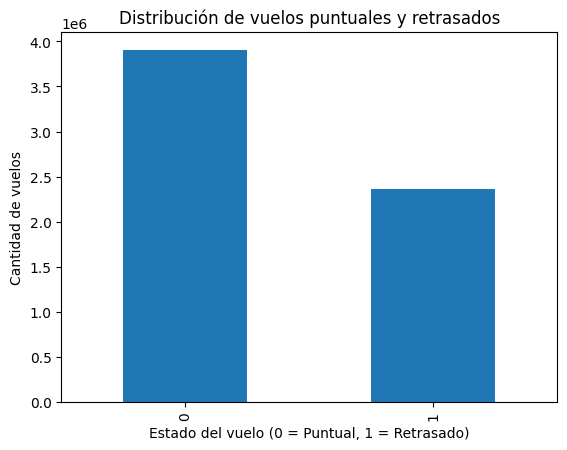

In [38]:
import matplotlib.pyplot as plt
plt.figure()
df_final_data["delays"].value_counts().plot(kind="bar")
plt.xlabel("Estado del vuelo (0 = Puntual, 1 = Retrasado)")
plt.ylabel("Cantidad de vuelos")
plt.title("Distribución de vuelos puntuales y retrasados")
plt.show()


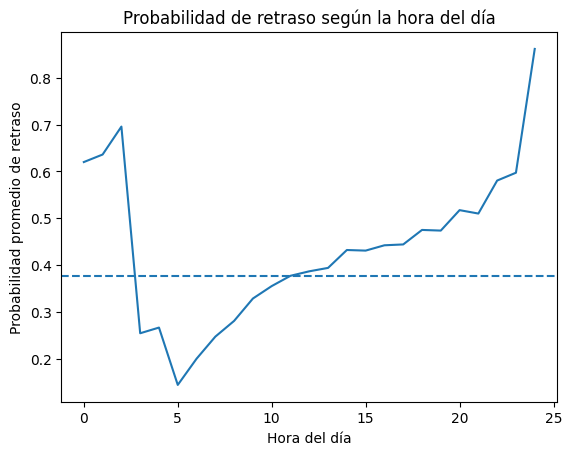

In [41]:
plt.figure()
df_final_data.groupby("hour")["delays"].mean().plot()
plt.axhline(df_final_data["delays"].mean(), linestyle="--")
plt.xlabel("Hora del día")
plt.ylabel("Probabilidad promedio de retraso")
plt.title("Probabilidad de retraso según la hora del día")
plt.show()


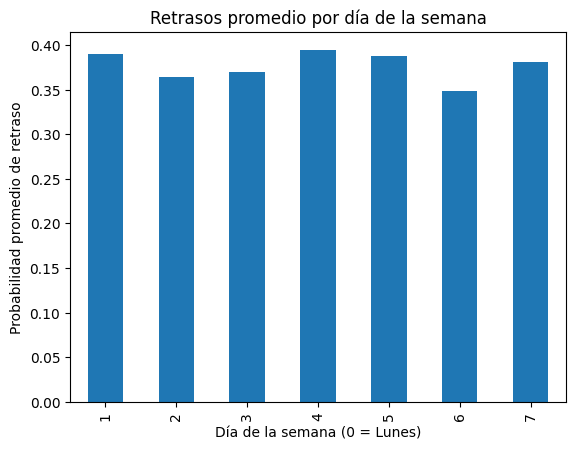

In [42]:
plt.figure()
df_final_data.groupby("day_of_week")["delays"].mean().plot(kind="bar")
plt.xlabel("Día de la semana (0 = Lunes)")
plt.ylabel("Probabilidad promedio de retraso")
plt.title("Retrasos promedio por día de la semana")
plt.show()


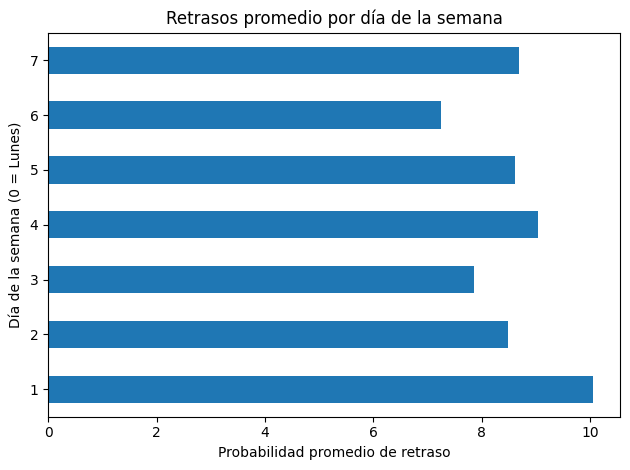

In [55]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df_final_data.groupby("day_of_week")["delay"].mean().plot(
    kind="barh",
    ax=ax
)
ax.set_xlabel("Probabilidad promedio de retraso")
ax.set_ylabel("Día de la semana (0 = Lunes)")
ax.set_title("Retrasos promedio por día de la semana")

plt.tight_layout()
plt.show()



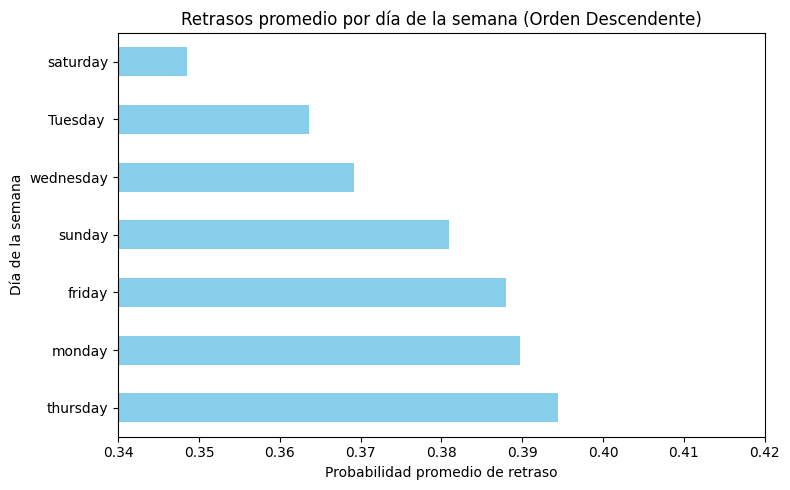

In [60]:
##grafico de retrasos por dia de semana
day_of_week_delays = df_final_data.groupby("day_of_week")["delays"].mean().sort_values(ascending=False)

day_names_map = {
    1: 'monday', 2: 'Tuesday ', 3: 'wednesday', 4: 'thursday',
    5: 'friday', 6: 'saturday', 7: 'sunday'
}
day_labels = [day_names_map[day] for day in day_of_week_delays.index]

plt.figure(figsize=(8, 5))
day_of_week_delays.plot(kind="barh", color="skyblue")

plt.xlim(0.34, 0.42)

plt.xlabel("Probabilidad promedio de retraso")
plt.ylabel("Día de la semana")
plt.title("Retrasos promedio por día de la semana (Orden Descendente)")

plt.yticks(ticks=range(len(day_labels)), labels=day_labels)

plt.tight_layout()
plt.show()

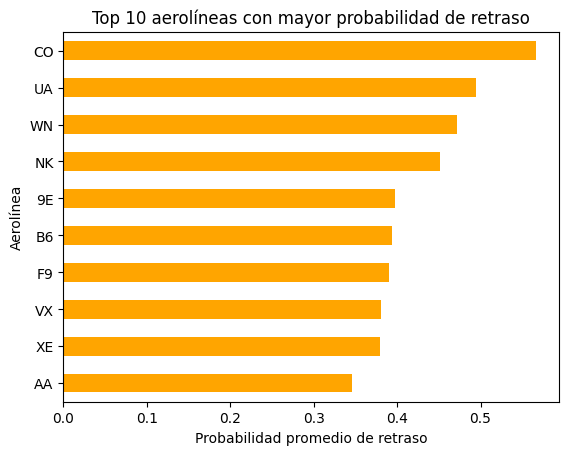

In [43]:
plt.figure()
(
    df_final_data.groupby("airline")["delays"]
    .mean()
    .sort_values()
    .tail(10)
    .plot(kind="barh", color="orange")
)

plt.xlabel("Probabilidad promedio de retraso")
plt.ylabel("Aerolínea")
plt.title("Top 10 aerolíneas con mayor probabilidad de retraso")
plt.show()


In [44]:
airport_stats = df_final_data.groupby("airline").agg(
    retraso_promedio=("delays", "mean"),
    total_vuelos=("delays", "count")
)

airport_stats = airport_stats[airport_stats["total_vuelos"] > 500]

airport_stats.sort_values("retraso_promedio", ascending=False).head(10)


,retraso_promedio,total_vuelos
airline,,
CO,0.566199,21118
UA,0.494265,537153
WN,0.471908,1340226
NK,0.451167,115454
9E,0.397660,20686
B6,0.393373,280955
F9,0.390631,96746
VX,0.380859,61385
XE,0.378944,31126


In [49]:
airport_stats.index.unique()

Index(['9E', 'AA', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'NK',
       'OH', 'OO', 'UA', 'US', 'VX', 'WN', 'XE', 'YV'],
      dtype='object', name='airline')